In [1]:
# Best using Features Selection: mutual_info_classif
# Approach to find relationship between label and features

# Read data from external file 
import pandas as pd 
df = pd.read_csv("/Users/nuwai/Downloads/Reduced_Class_Train.csv")

In [2]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['gender','timing','typeOfTravel','destination','activities','transport','planning','package','foodplace','attractions','accommodation','cancelPolicy']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    

In [4]:
# Data slicing 
x = df.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13,14]]  #features
y = df.iloc[:, 6]  #label
x.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            350 non-null    int64
 1   gender         350 non-null    int32
 2   budget         350 non-null    int64
 3   noOfStays      350 non-null    int64
 4   timing         350 non-null    int32
 5   typeOfTravel   350 non-null    int32
 6   destination    350 non-null    int32
 7   activities     350 non-null    int32
 8   transport      350 non-null    int32
 9   planning       350 non-null    int32
 10  package        350 non-null    int32
 11  foodplace      350 non-null    int32
 12  attractions    350 non-null    int32
 13  accommodation  350 non-null    int32
 14  cancelPolicy   350 non-null    int32
dtypes: int32(12), int64(3)
memory usage: 24.7 KB


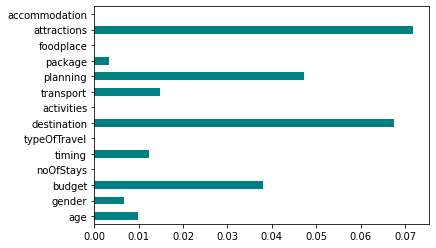

In [5]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(x, y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [6]:
# Data slicing 
x = df.iloc[:, [0,2,9,10,12,14]]
y = df.iloc[:, [6]] 
x.head() 

,age,budget,planning,package,attractions,cancelPolicy
0,21,2000,1,1,1,1
1,21,5000,0,0,2,1
2,22,800,0,1,0,1
3,32,1200,0,0,2,1
4,36,1200,0,0,1,1


In [7]:
# Convert dataframe to array 
x = x.values 
y = y.values 
y = y.ravel() 

In [8]:
# K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', algorithm = 'auto', leaf_size=100, p = 1, metric = 'minkowski') 

model.fit(x, y) 
yPred = model.predict(x) 

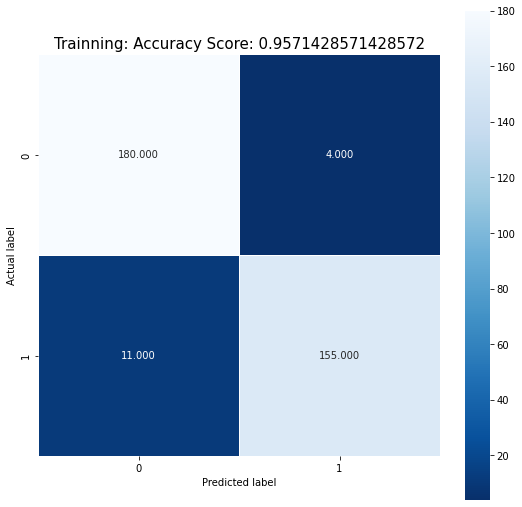

In [9]:
# Testing & performance analysis -Trainning data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Trainning: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred)) 
plt.title(all_sample_title, size = 15); 

In [10]:
# Read data from external file 
import pandas as pd 
df2 = pd.read_csv("/Users/nuwai/Downloads/Reduced_Class_Test.csv") 

In [11]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['gender','timing','typeOfTravel','destination','activities','transport','planning','package','foodplace','attractions','accommodation','cancelPolicy']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])

In [12]:
# Data slicing 
x2 = df2.iloc[:, [0,2,9,10,12,14]] #77%
#x2 = dfCSV2.iloc[:, [10,9,6,5,3,1]] #68%
#x2 = dfCSV2.iloc[:, [9,1]] #?
#x2 = dfCSV2.iloc[:, [9,6,2,1]] #?%
y2 = df2.iloc[:, [6]] 
x2.head() 

,age,budget,planning,package,attractions,cancelPolicy
0,25,4500,1,1,1,1
1,18,1000,0,1,2,0
2,21,1000,0,1,1,1
3,18,2000,0,1,1,1
4,41,5000,0,0,1,1


In [13]:
# Convert dataframe to array 
x2 = x2.values 
y2 = y2.values 
y2 = y2.ravel() 

yPred2 = model.predict(x2) 

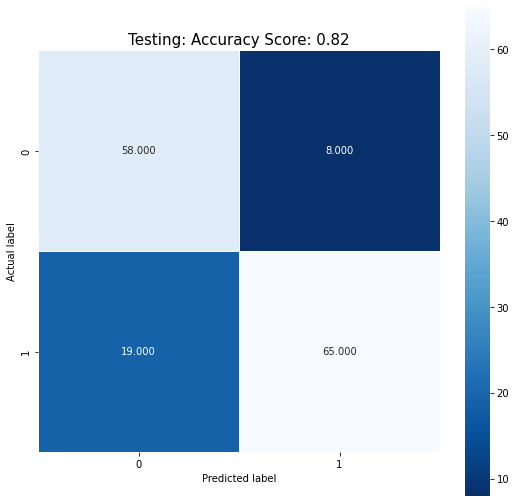

In [14]:
# Testing & performance analysis -Testing data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2)) 
plt.title(all_sample_title, size = 15);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            350 non-null    int64
 1   gender         350 non-null    int32
 2   budget         350 non-null    int64
 3   noOfStays      350 non-null    int64
 4   timing         350 non-null    int32
 5   typeOfTravel   350 non-null    int32
 6   destination    350 non-null    int32
 7   activities     350 non-null    int32
 8   transport      350 non-null    int32
 9   planning       350 non-null    int32
 10  package        350 non-null    int32
 11  foodplace      350 non-null    int32
 12  attractions    350 non-null    int32
 13  accommodation  350 non-null    int32
 14  cancelPolicy   350 non-null    int32
dtypes: int32(12), int64(3)
memory usage: 24.7 KB
